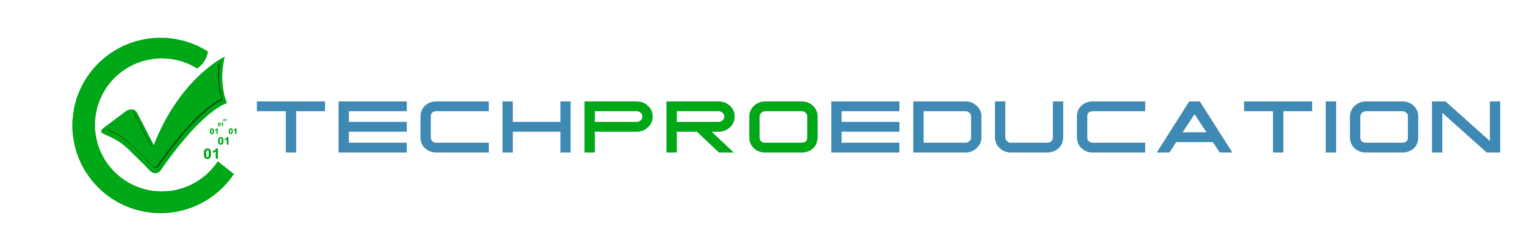

# Hand Written Digits Project

**OZET:** 44 kisiye LCD ekrana ve kablosuz bir kaleme sahip WACOM PL-100V basınca duyarlı bir tabletler verilmis ve el yazilariyla 260'ar tane rakam (0-9) ytazmalari istenmistir. Kisiler tablete elle yazma konusunda deneyimsiz olduklari icin ilk 10 yazdiklari (kendilerinin haberi olmaksizin) silinmistir. Daha sonra 44 kisinin yazdigi 250'ser tane rakamin metrikleri cikarilarak 10992 tane gozlem degeri elde edilmis, 8 gozlem analiz edilebilir formatta olmadigi icin atilmistir. El yazilarinin 16 farkli ozelligi cikarildigi icin calismada 16 ozellik (feature) kullanilarak, bu yazilanlarin hangi rakam oldugu belirlenmeye calisilmistir. DOlayisiyla hedef (target) degisken 10 kategoriye sahiptir. 

Gelistirilecek Makine Ogrenmesi modelinin farkli kisiler tarafindan elle yazilan rakamlari da taniyabilmesinin saglanabimesi icin ilk 30 yazardan elde edilen gozlemler egtim (train), son 14 yazardan gelen veriler test icin kullanilmistir. 

Calismada Karar Agaci (**Decision Tree**: DT), Rastgele Orman (**Random Forest**: RF) ve Karar Destek Siniflandiricisi (**Support Vector Classifier**: SVC) algoritmalari kullanilmistir. Ek olarak **Lazy Predict**, **Random Search Optimizasyon** ve **Optuna Bayesian Optimizasyon** gibi yontemler de calismaya dahil edilmistir. Analizler once tum ozellikler (16 feature) kullanilarak gerceklestirilmis, elde edilen basari sokorlarinin cok iyi (accuracy 1) cikmasi nedeniyle, modelde ezberleme riskine karsi, Temel Bilesenler Analizi (PCA) yontemiyle aciklayici degisken sayisi 3'e indirilerek analizer yenilenmistir. Bu analizler sonucunda modelin skorlarinin 0.93 seviyelerinde oldugu, yani gelistirilen Makine Ogrenemsi algoritmasinin elle yazilan rakamlari %93 dogruluk seviyesnde basarili bir sekilde tahmin edebildigi gorulmustur.

**Anahtar Kelimeler:** Pendigits Dataset, Decision Tree, Random Forest, (Support Vector Machine/Classifier, Lazy Predict, Random Search Optimizasyon, Optuna Bayesian Optimizasyon. 


**Data reference link:** Pendigits Dataset 
1) https://datahub.io/machine-learning/pendigits#readme 
2) https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits

**Konunun Dayandigi Makale:** Alpaydin, E. and Alimoglu, F. (1996). Combining multiple representations and classifiers for pen-based handwritten digit recognition. Proceedings of the Fourth International Conference on Document Analysis and Recognition. doi:10.1109/icdar.1997.620583

# Exploratory Data Analysis and Visualization

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

plt.rcParams["figure.figsize"] = (15,7)

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
init_notebook_mode(connected=True)
cf.go_offline()

# %matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Read and Look at the Data Set

In [2]:
df = pd.read_csv("pendigits_txt.csv") 

In [3]:
df.head(5)

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [41]:
df.tail(5)

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
10987      36     100      24      70       0      38      49      33      95   
10988      16      75      41     100      52      64      32      27       0   
10989      56     100      27      79       0      39      12       0      66   
10990      19     100       0      61       3      23      48       0      97   
10991      38     100      37      81      12      55       0      28      52   

       input10  input11  input12  input13  input14  input15  input16  class  
10987       47       87       55       96       21      100        0      4  
10988        0       21        9       62        2      100       14      2  
10989       15      100       51       93       93       38       93      0  
10990       27      100       66       62       97       10       81      0  
10991       27      100       42       86       26       65        0      4

In [42]:
df.sample(5)

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
6697      68     100       0      90      62      47     100       0      15   
5287      12      78      43     100     100      97      78      66      38   
8798      16      89       0      68      28      92      95     100     100   
5913      56     100      19      71       0      38      45      16      84   
7312     100     100      55      78      21      52       0      22      27   

      input10  input11  input12  input13  input14  input15  input16  class  
6697        5       53       55       97      100       18       84      8  
5287       40        0       13       38        0      100        3      2  
8798       89       83       58       68       27       65        0      7  
5913       39      100       66       69       34       52        0      4  
7312        0       79       14       53       27        1       10      6

## Summary Statistics of Data Set

In [5]:
df.shape

(10992, 17)

**Yorum:** Data setinde 10992 satir ve 17 sutun yer almaktadir. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


**Yorum:** Bos satir olmayan veri seti sayisal degerlerden olusmaktadir.

## Is Data Set Balanced or Not?

In [47]:
df["class"].value_counts()

2    1144
4    1144
1    1143
0    1143
7    1142
6    1056
8    1055
5    1055
9    1055
3    1055
Name: class, dtype: int64

In [48]:
len(df["class"].value_counts())

10

**Yorum:** Hedef degiskende her bir class'tan (rakamdan) birbirine yakin adette bulunmakta olup, **dengeli (balanced)** bir veri seti soz kinusudur. Hedef degiskende 10 farkli class (tur) uer almaktadir. Bu yonuyle veri; **multiclass** bir veri setidir. 

## Duplicated Data

In [49]:
df.duplicated().sum()

0

**YORUM:** Dublicate veri bulunmamakta.

## Decriptive Statistics

In [57]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

In [60]:
df.head(2)

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2

## Correlation Analysis

In [7]:
# Korelasyon matrisini hesaplamak
# df.corr = df.corr()
df.corr = df.select_dtypes(include=['number']).corr()

df.corr

input1    input2    input3    input4    input5    input6    input7  \
input1   1.000000  0.347763  0.280842  0.119645 -0.439896 -0.103732 -0.367140   
input2   0.347763  1.000000 -0.080164  0.214167 -0.310583 -0.255377 -0.320403   
input3   0.280842 -0.080164  1.000000  0.442439  0.416487  0.456945 -0.190123   
input4   0.119645  0.214167  0.442439  1.000000  0.194851  0.675734 -0.036291   
input5  -0.439896 -0.310583  0.416487  0.194851  1.000000  0.464945  0.428410   
input6  -0.103732 -0.255377  0.456945  0.675734  0.464945  1.000000  0.185721   
input7  -0.367140 -0.320403 -0.190123 -0.036291  0.428410  0.185721  1.000000   
input8  -0.102077 -0.383218  0.295910  0.269129  0.356024  0.779892  0.379678   
input9  -0.038296 -0.080932 -0.144281 -0.156279 -0.223791 -0.036021  0.437459   
input10 -0.102762 -0.306630 -0.036834 -0.282295  0.049201  0.155711  0.354902   
input11  0.189202  0.144516 -0.022503 -0.181192 -0.323276 -0.150013 -0.161516   
input12 -0.106069 -0.023232 -0.463429 -0.732677 -0.308267 -0.632538  0.099955   
input13  0.135265  0.134331 -0.162873 -0.089374 -0.340178 -0.181143 -0.371791   
input14 -0.022685  0.124136 -0.472660 -0.647705 -0.281341 -0.794761 -0.080724   
input15 -0.358122 -0.134720 -0.179291  0.114119  0.052736  0.093721  0.035337   
input16  0.034411  0.127604 -0.315304 -0.385121 -0.125011 -0.598063 -0.102561   
class    0.352199  0.232075  0.243030  0.183646  0.039919  0.153520 -0.123090   

           input8    input9   input10   input11   input12   input13   input14  \
input1  -0.102077 -0.038296 -0.102762  0.189202 -0.106069  0.135265 -0.022685   
input2  -0.383218 -0.080932 -0.306630  0.144516 -0.023232  0.134331  0.124136   
input3   0.295910 -0.144281 -0.036834 -0.022503 -0.463429 -0.162873 -0.472660   
input4   0.269129 -0.156279 -0.282295 -0.181192 -0.732677 -0.089374 -0.647705   
input5   0.356024 -0.223791  0.049201 -0.323276 -0.308267 -0.340178 -0.281341   
input6   0.779892 -0.036021  0.155711 -0.150013 -0.632538 -0.181143 -0.794761   
input7   0.379678  0.437459  0.354902 -0.161516  0.099955 -0.371791 -0.080724   
input8   1.000000  0.295293  0.650526  0.113682 -0.237330 -0.128662 -0.719883   
input9   0.295293  1.000000  0.533213  0.603845  0.291837 -0.067068 -0.097271   
input10  0.650526  0.533213  1.000000  0.389667  0.474586  0.023574 -0.215487   
input11  0.113682  0.603845  0.389667  1.000000  0.274444  0.430547 -0.026326   
input12 -0.237330  0.291837  0.474586  0.274444  1.000000  0.160290  0.659548   
input13 -0.128662 -0.067068  0.023574  0.430547  0.160290  1.000000  0.122467   
input14 -0.719883 -0.097271 -0.215487 -0.026326  0.659548  0.122467  1.000000   
input15 -0.133502 -0.390861 -0.335933 -0.677238 -0.124953  0.000832  0.050666   
input16 -0.711123 -0.268439 -0.454487 -0.205178  0.291415  0.065784  0.857205   
class    0.108829 -0.170221 -0.044632 -0.011499 -0.123672  0.089234 -0.036312   

          input15   input16     class  
input1  -0.358122  0.034411  0.352199  
input2  -0.134720  0.127604  0.232075  
input3  -0.179291 -0.315304  0.243030  
input4   0.114119 -0.385121  0.183646  
input5   0.052736 -0.125011  0.039919  
input6   0.093721 -0.598063  0.153520  
input7   0.035337 -0.102561 -0.123090  
input8  -0.133502 -0.711123  0.108829  
input9  -0.390861 -0.268439 -0.170221  
input10 -0.335933 -0.454487 -0.044632  
input11 -0.677238 -0.205178 -0.011499  
input12 -0.124953  0.291415 -0.123672  
input13  0.000832  0.065784  0.089234  
input14  0.050666  0.857205 -0.036312  
input15  1.000000  0.123808 -0.071037  
input16  0.123808  1.000000  0.085062  
class   -0.071037  0.085062  1.000000

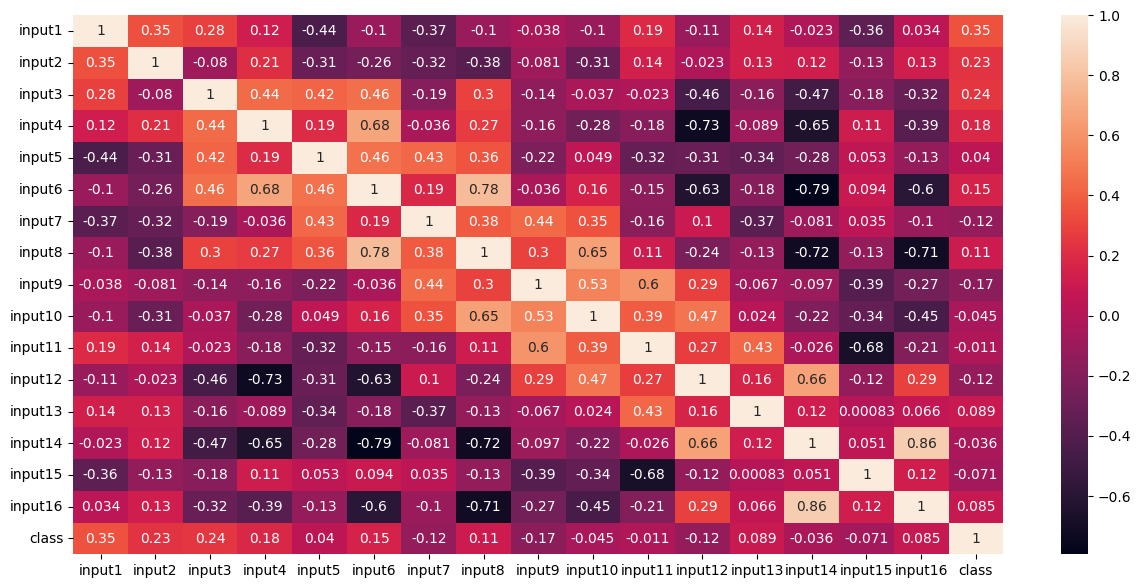

In [8]:
sns.heatmap(df.corr, annot = True)
plt.show()

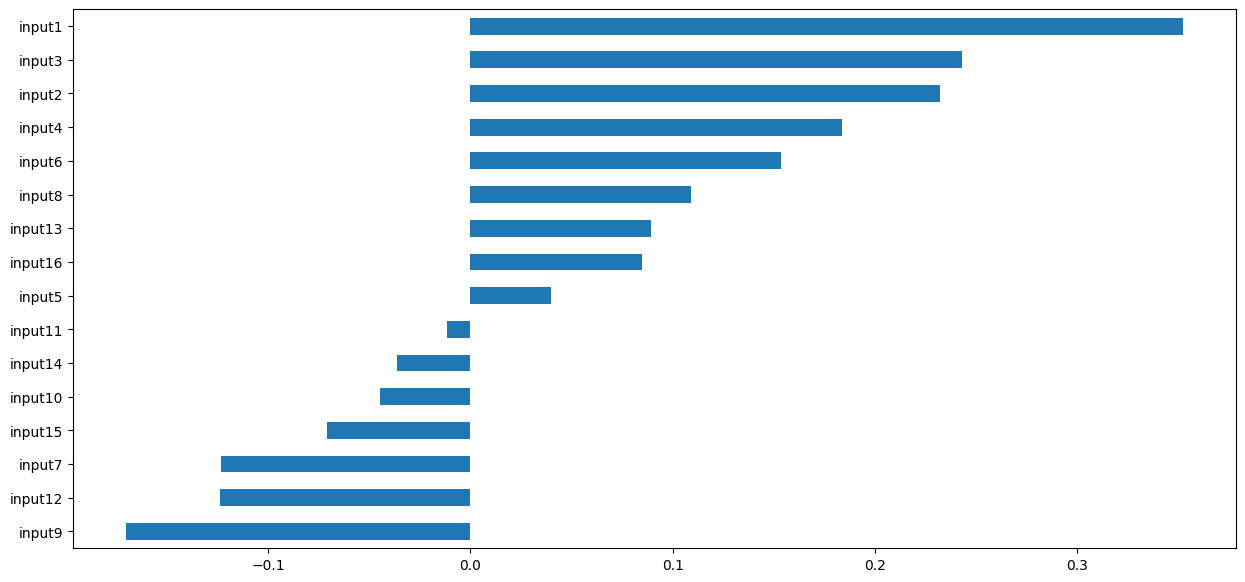

In [9]:
# Let's look at the relationship between features and target variable with the help of a graph;

df.corr["class"].drop("class").sort_values().plot.barh()
plt.show()

**Yorum:** Veri setinde features arasinda yuksek korelasyon bulunmamaktadir. 

# TUM GOZLEMLER KULLANILARAK YAPILAN ANALIZLER

## Data Visulation

### Pairplot

KeyboardInterrupt: 

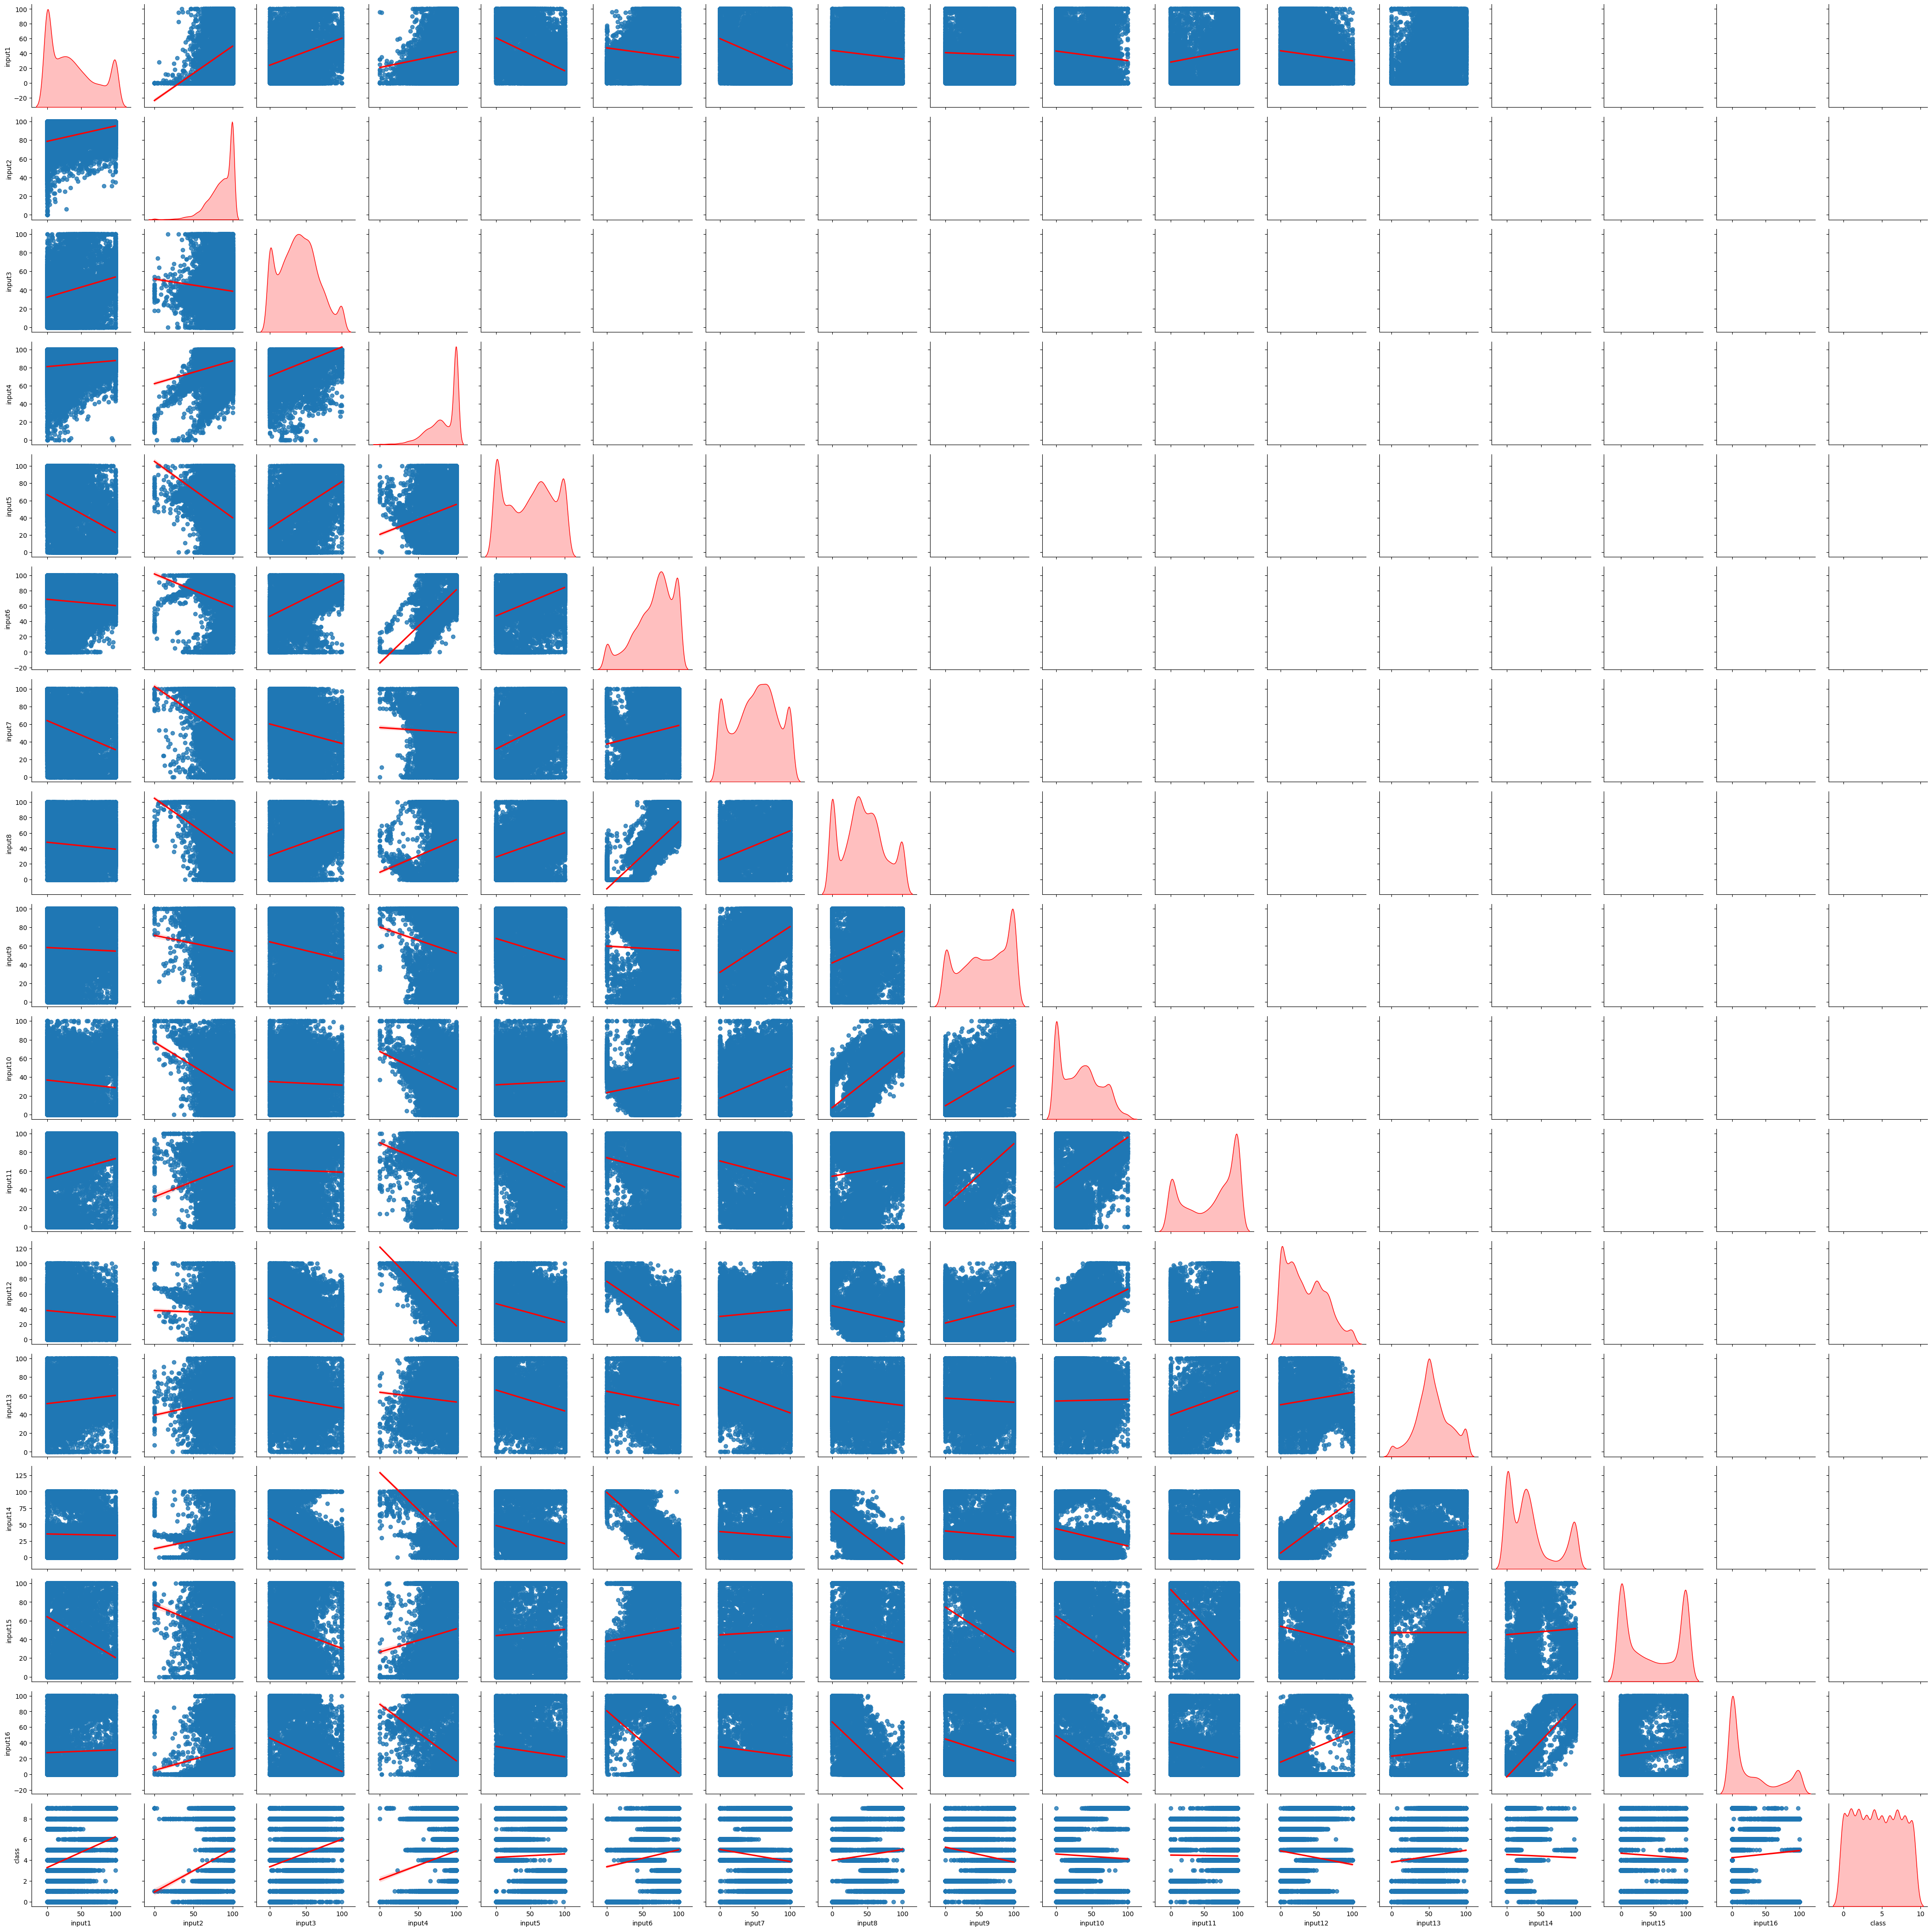

In [10]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

### Outlier Analysis with Boxplot

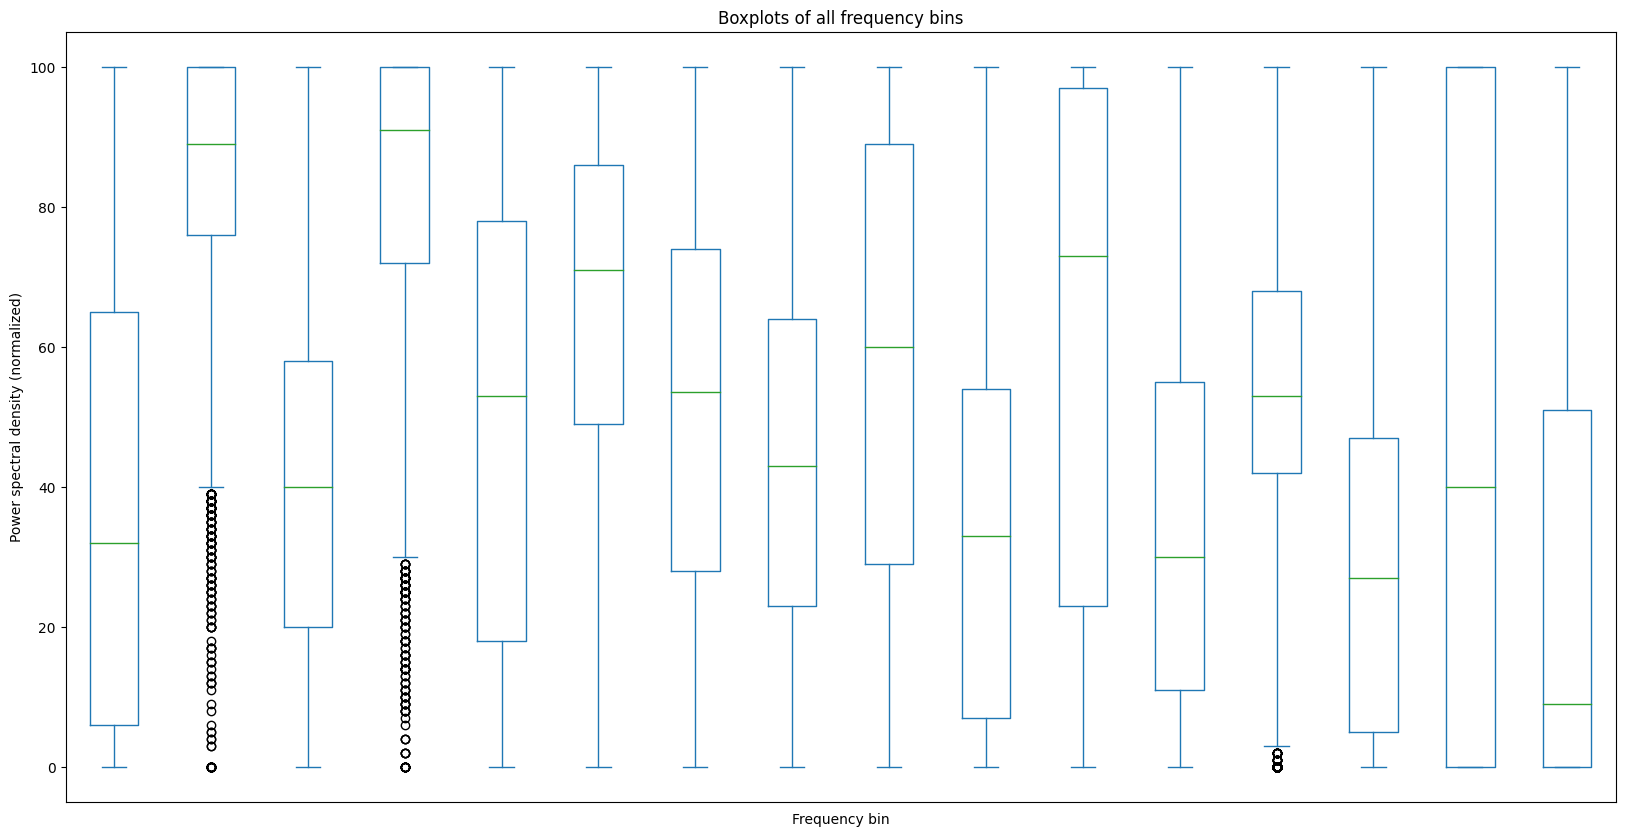

In [84]:
X = df.iloc[:,:-1]
X.plot.box(figsize=(20,10),xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')
plt.show()

### Scatterplot

In [ ]:
df.columns

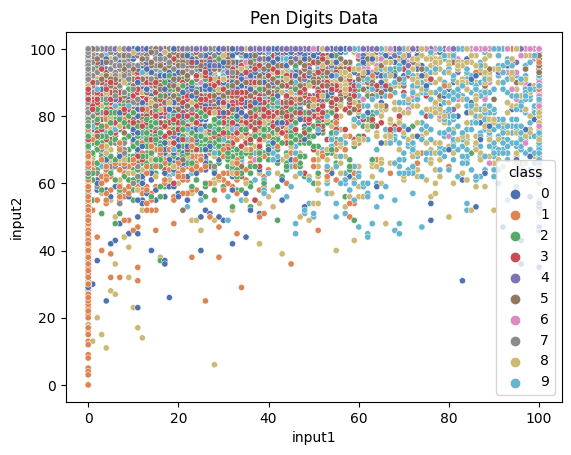

In [70]:
sns.scatterplot(data=df, x="input1", y="input2", hue="class", s=20, palette='deep',legend="full" )
plt.title('Pen Digits Data')
plt.show()

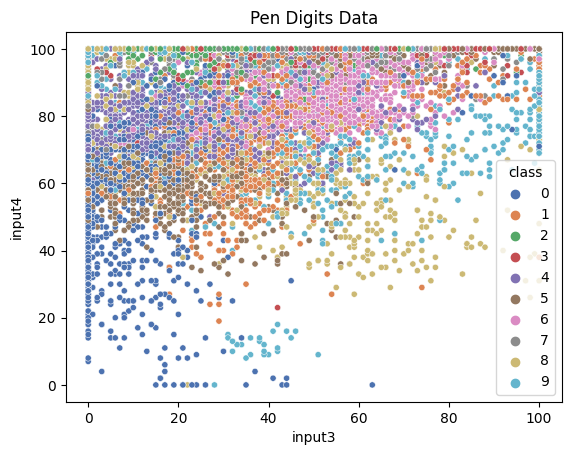

In [73]:
sns.scatterplot(data=df, x="input3", y="input4", hue="class", s=20, palette='deep',legend="full" )
plt.title('Pen Digits Data')
plt.show()

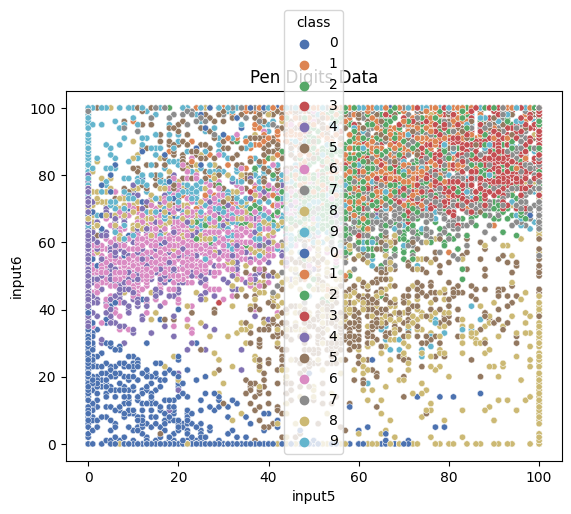

In [72]:
sns.scatterplot(data=df, x="input5", y="input6", hue="class", s=20, palette='deep',legend="full" )
plt.title('Pen Digits Data')
plt.show()

In [ ]:
# Bu grafikleri begenmedim. Ayrica PCA ile feature sayisini azaltarak  bu grafikleri tekrar cizdirecegim.

## Labelling & Train-Test Split

In [ ]:
X=df.drop(["class"], axis=1)
y=df["class"]

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False, random_state = 42)

# shuffle=False yapmak lazim cunku gozlemler sirayla verilmis. Bu sekilde bastan %70'ni 
# (44 yazarin el yazmalarini) traine, gerisini (14 yazarin el yazmalarini, %30) teste ayiracak.

In [78]:
X_train.shape, X_test.shape

((7694, 16), (3298, 16))

**YORUM:** Veri setindeki 10992 gozlemden 7694'u train kismina, 3298'i test kismina  ayrilmsitir. 

## Lazy Predict for an Overview of the Models

Elimizdeki veri setinin farkli Makie Ogrenmesi algoritmalariyla uyumunu gorebilmek acisindan Lazy Predict methodu kullanilmis, boylece konuya genel bir bakis atilmasi aglanmistir.   

In [20]:
from lazypredict.Supervised import LazyClassifier

# LazyClassifier'ı oluşturmak
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Modeli eğitmek
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Sonuçları yazdırmak
print(models)

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:48<00:01,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1606
[LightGBM] [Info] Number of data points in the train set: 7694, number of used features: 16
[LightGBM] [Info] Start training from score -2.252397
[LightGBM] [Info] Start training from score -2.259841
[LightGBM] [Info] Start training from score -2.266087
[LightGBM] [Info] Start training from score -2.346966
[LightGBM] [Info] Start training from score -2.266087
[LightGBM] [Info] Start training from score -2.344252
[LightGBM] [Info] Start training from score -2.346966
[LightGBM] [Info] Start training from score -2.271113
[LightGBM] [Info] Start training from score -2.337500
[LightGBM] [Info] Start training from score -2.342898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:53<00:00,  1.85s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LabelPropagation                   0.98               0.98    None      0.98   
LabelSpreading                     0.98               0.98    None      0.98   
SVC                                0.98               0.98    None      0.98   
KNeighborsClassifier               0.98               0.98    None      0.98   
ExtraTreesClassifier               0.98               0.98    None      0.98   
RandomForestClassifier             0.97               0.97    None      0.97   
LGBMClassifier                     0.97               0.97    None      0.97   
XGBClassifier                      0.97               0.97    None      0.97   
BaggingClassifier                  0.96               0.96    None      0.96   
QuadraticDiscriminantAnalysis      0.95               0.95    None      0.95   
DecisionTreeClassifier             0.93 

**YORUM:** Bu sonuclara gore ele alinan veri setinde en iyi skorlari, en kisa surede veren algoritma; SVC (Support Vector Classifier)'dir.

## Decision Tree & Random Forest Classifiers

RF modeli verilerin olceklendirilmesine (scaling) duyarli olmadigi (scaling gerekmedigi) icin calismanin bu bolumunde scale edilmemis verilerle ilerlenmistir. 

### Modelling and Model Performance

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Decision Tree Classifier

Bu projede verilen gorev Random Forest yontemini kullanmak olmakla birlikte, Random Forestin temelini olusturmasi yonuyle calismaya Decisiyon Tree analizi ile baslanmasinin daha dogru olacagina karar verilmisitir.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[321   0   1   0   0   0   1   1  10   0]
 [  0 304  32   1   0   1   1   1   0   0]
 [  0  14 329   0   0   0   1   2   0   0]
 [  0   7   3 306   0   1   0   0   0   2]
 [  0   1   0   0 314   5   8   0   0  18]
 [  0   0   0  10   3 290   0   0   5   9]
 [  9   7   2   0   0   0 297   0   4   1]
 [  0  18   3   7   0   0   2 316   2   0]
 [  4   1   0   0   0   3   2   4 297   1]
 [  0   4   0   1   7   6   2   4   2 290]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       334
           1       0.85      0.89      0.87       340
           2       0.89      0.95      0.92       346
           3       0.94      0.96      0.95       319
           4       0.97      0.91      0.94       346
           5       0.95      0.91      0.93       317
           6       0.95      0.93      0.94       320
           7       0.96      0.91      0.93       348
           8       0.93      0.95      0.94       312
           9       

**YORUM:** Modelin train kismindaki basarisi %100, accuracy 1 iken test kisminda accuracy 0.93 olmustur. Overfitting olabilecegi endisesiyle CV yapmaya karar verilmistir.

#### Cross Validation for DT

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [25]:
model = DecisionTreeClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.96
test_precision_micro   0.96
test_recall_micro      0.96
test_f1_micro          0.96
dtype: float64

**YORUM:** CV de elde edilen sonuclar (Or; accuracy = 0.96) test datasina ait sonuclarla (accuracy = 0.93) uyumlu oldugu icin, Decision Tree modelinde **overfit olmadigina** karar verilmistir.

#### Classification Success Visulation for Decision Tree

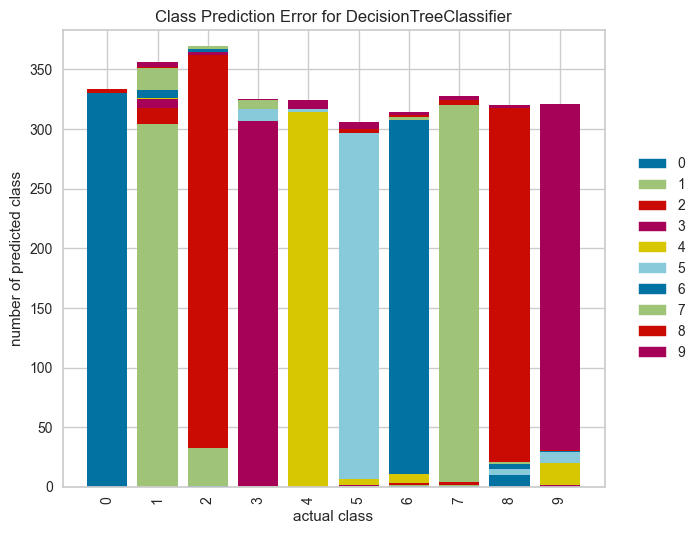

In [26]:
from yellowbrick.classifier import ClassPredictionError

DT_model = DecisionTreeClassifier(random_state=42)
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

**YORUM:** Goruldugu gibi DT modeli en iyi performansi "4"leri siniflandirirken gostermistir. Onu "7" ve "0" takip etmistir.

#### Feature Importances for Decision Tree

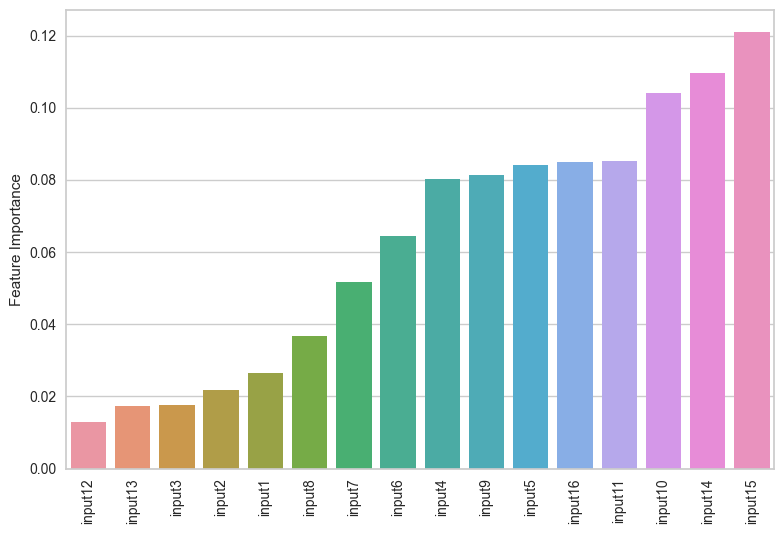

In [27]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**YORUM:** Bu grafige gore el yazisi rakamlarin makine tarafindan taninmasinda en etkili ozellikler (features); 15, 14 ve 10. ozellilerdir. 

#### ROC Curve for Decision Tree

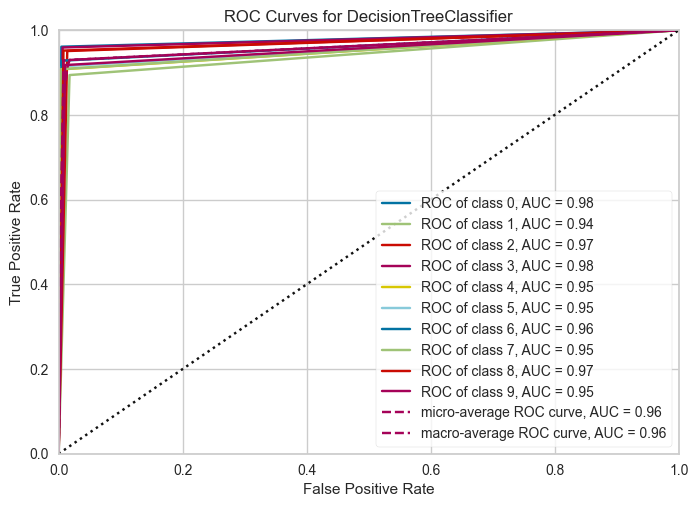

In [28]:
from yellowbrick.classifier import ROCAUC # multiclass datalarda  yellowbrick.classifier kutuphanesinden yardim aliyoruz

visualizer = ROCAUC(DT_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

**YORUM:** DT modelinin ROC skorlarinin genel olarak iyi oldugu gorulmektedir.

#### GridSearchCV Analysis for Decision Tree Model

In [29]:
model = DecisionTreeClassifier(random_state=101)
param_grid = {"splitter":["best", "random"],
              "max_features":[2, 3],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6]}
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=10,
                          n_jobs = -1)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [31]:
grid_model.best_params_

{'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [33]:
grid_model.best_score_

0.938007194366102

In [30]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[325   0   0   0   0   2   0   4   2   1]
 [  1 297  31   0   2   4   0   4   0   1]
 [  0  16 327   0   0   0   1   2   0   0]
 [  0   6   2 303   0   2   1   2   0   3]
 [  0  14   1   0 319   1  10   0   0   1]
 [  2   4   0  10   1 283   5   1   1  10]
 [  2   2   0   0   1   2 309   2   2   0]
 [  1  30   8   4   0   3   0 297   5   0]
 [  1   0   1   0   0   1   0   4 305   0]
 [  0   8   0   4   2   3   0   6   2 291]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       334
           1       0.79      0.87      0.83       340
           2       0.88      0.95      0.91       346
           3       0.94      0.95      0.95       319
           4       0.98      0.92      0.95       346
           5       0.94      0.89      0.92       317
           6       0.95      0.97      0.96       320
           7       0.92      0.85      0.89       348
           8       0.96      0.98      0.97       312
           9       

**YORUM:** GrisdSearchCV ile elde edilen sonuclara gore; train datasina ait accuracy skoru 0.99 iken test datasinda bu deger 0.93 olmustur. Ilkel DT skoruna goreiyilesme var olup, tahminde asiri ogrenme (overfitting) sorunu bulunmadinina karar verilmisitr. 

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[318   0   0   0   0   0   0   0  16   0]
 [  0 312  25   1   1   0   0   1   0   0]
 [  0   5 341   0   0   0   0   0   0   0]
 [  0   3   0 315   0   0   0   0   0   1]
 [  0   0   0   0 346   0   0   0   0   0]
 [  0   0   0   7   0 298   0   0   2  10]
 [  0   0   0   0   0   0 320   0   0   0]
 [  0  10   3   0   0   0   0 328   0   7]
 [  2   0   0   0   0   0   0   0 310   0]
 [  0   2   0   0   0   0   0   2   1 311]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       334
           1       0.94      0.92      0.93       340
           2       0.92      0.99      0.95       346
           3       0.98      0.99      0.98       319
           4       1.00      1.00      1.00       346
           5       1.00      0.94      0.97       317
           6       1.00      1.00      1.00       320
           7       0.99      0.94      0.97       348
           8       0.94      0.99      0.97       312
           9       

**YORUM:** RF'de train datasina ait accuracy skoru 1'e cikarken, test kismina ait accuracy degeri de 0.97'ye yukselmistir. Bu durum; RF'nin basari performansinin DT'den daha yuksek oldugunu gostermektedir. Train datasinda elde edilen 1 skorunun tum data icin gecerliligini sinayabilmek amaciyla capraz dogrulama (CV) islemi gerceklestirilmesine karar verilmistir.

#### Cross Validation for Random Forest

In [37]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.99
test_precision_micro   0.99
test_recall_micro      0.99
test_f1_micro          0.99
dtype: float64

**YORUM:** CV de elde edilen accuracy skoru 0.99 olup, test datasina ait sonucla (accuracy = 0.97) uyumlu oldugu icin, Random Forest modelinde **overfit olmadigina** karar verilmistir.

#### Classification Success Visulation for Random Forest Tree

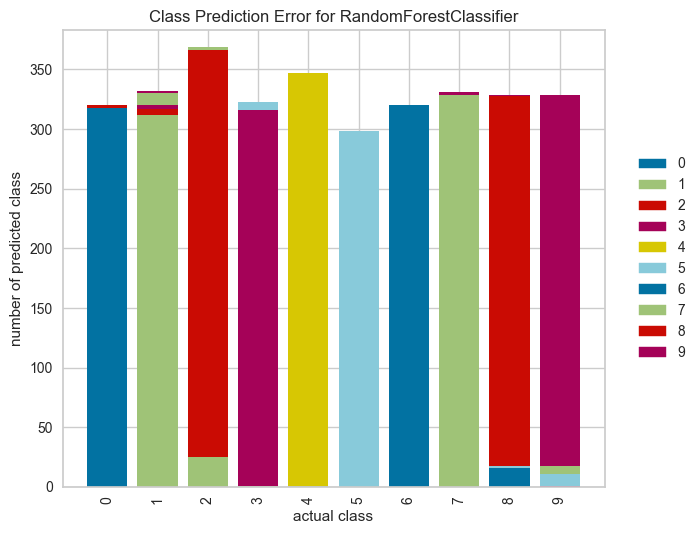

In [38]:
from yellowbrick.classifier import ClassPredictionError

RF_model = RandomForestClassifier(random_state=42)
visualizer = ClassPredictionError(RF_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

**YORUM:** RF modeli de en iyi performansi "4", "5" ve "6"lari siniflandirirken gostermistir. RF'nin classification basarisinin DT'den daha yuksek oldugu gorulmektedir.

#### Feature Importances for Random Forest

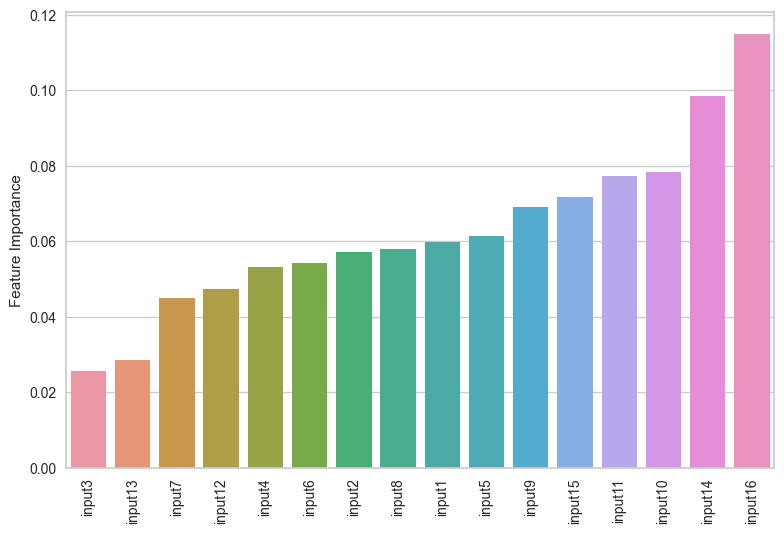

In [39]:
df_f_i = pd.DataFrame(index=X.columns, data = RF_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**YORUM:** Bu grafige gore el yazisi rakamlarin RF modeli tarafindan taninmasinda en etkili ozellikler yine 16, 14 ve 10 nolu feature'lerdir. Burada 14 ve 10 nolu ozelliklerin agirliginin DT'ye gore azaldigi dikkat cekmektedir.

#### ROC Curve for Random Forest

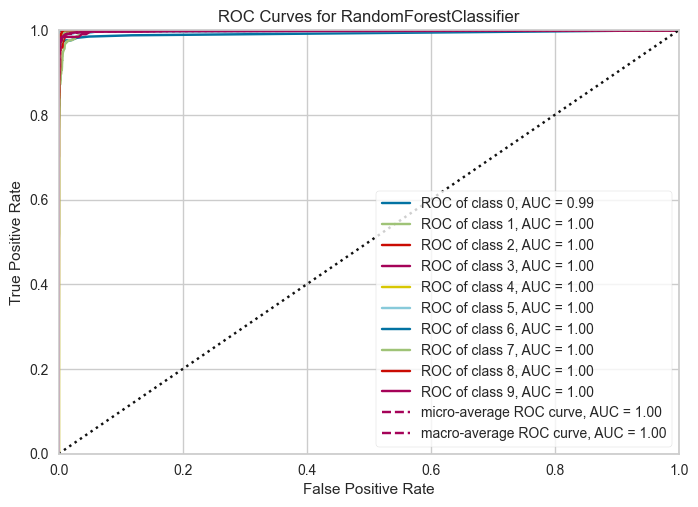

In [40]:
from yellowbrick.classifier import ROCAUC # multiclass datalarda  yellowbrick.classifier kutuphanesinden yardim aliyoruz

visualizer = ROCAUC(RF_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

**YORUM:** RF modelinin ROC skorlarinin cok iyi oldugu gorulmektedir.

#### GridSearchCV for Random Forest

In [43]:
param_grid = {'n_estimators':[32, 50, 64, 100, 128, 200],     
             'max_features':[2, 3, 4, "sqrt","log2"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
RF_grid_model = GridSearchCV(model, param_grid, scoring = "accuracy", n_jobs = -1, verbose = -1).fit(X_train, y_train)

In [45]:
RF_grid_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [46]:
RF_grid_model.best_score_

0.983494002066767

In [47]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[318   0   0   0   0   0   0   0  16   0]
 [  0 293  44   1   1   0   0   1   0   0]
 [  0   6 339   0   0   0   0   1   0   0]
 [  0   4   0 315   0   0   0   0   0   0]
 [  0   0   0   0 344   1   0   0   0   1]
 [  0   0   0  15   0 288   0   0   1  13]
 [  1   0   0   0   0   0 319   0   0   0]
 [  0  17   2   1   0   0   0 316   0  12]
 [  1   0   0   0   0   0   0   0 311   0]
 [  0   2   0   2   0   0   0   2   1 309]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       334
           1       0.91      0.86      0.89       340
           2       0.88      0.98      0.93       346
           3       0.94      0.99      0.96       319
           4       1.00      0.99      1.00       346
           5       1.00      0.91      0.95       317
           6       1.00      1.00      1.00       320
           7       0.99      0.91      0.95       348
           8       0.95      1.00      0.97       312
           9       

**YORUM:** Grid Search yontemiyle belirlenen optimal hyper parametrelerle yapilan Random Forest analizinde accuracy degeri train datasinda 0.99. test datasinda 0.96 cikmistir. Modelin tahmin gucu yuksek, asiri ogrenme sorunu yoktur.

#### Random Search Optimizasyon for Random Forest

RandomizedSearchCV, parametrelerin rastgele seçilmiş kombinasyonlarını kullanarak en iyi parametre setini bulmaya çalışan bir yöntemdir. Parametre sayısı arttıkça, tüm kombinasyonları denemek yerine rastgele bir alt küme seçtiği için GridSearchCV'ye göre daha hızlı çalışır.

https://github.com/EmKa-Academy/ML-DS-Ogretici-Notebooklar/blob/main/GridSearch%20vs%20RandomSearch%20vs%20Optuna/grid_search%20vs%20random_search%20vs%20optuna.ipynb

In [53]:
# RandomizedSearchCV (Bu Kodda HATA Aliyorum, Gelistirmeye devam edecegim)!!!
"""import time
from sklearn.model_selection import RandomizedSearchCV

time_rand = time.time()

# Pipeline tanımı
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier()) ])

random_search = RandomizedSearchCV(pipeline,
                                   scoring='accuracy',
                                   cv=3,
                                   n_iter=30,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)
random_search.fit(X_train_scaled, y_train)
print("Time taken: ", time.time() - time_rand)

best_random_params = random_search.best_params_
best_random_pipeline = random_search.best_estimator_

random_search_accuracy = best_random_pipeline.score(X_test_scaled, y_test)"""

'import time\nfrom sklearn.model_selection import RandomizedSearchCV\n\ntime_rand = time.time()\n\n# Pipeline tanımı\npipeline = Pipeline([\n    (\'scaler\', StandardScaler()),\n    (\'classifier\', RandomForestClassifier()) ])\n\nrandom_search = RandomizedSearchCV(pipeline,\n                                   scoring=\'accuracy\',\n                                   cv=3,\n                                   n_iter=30,\n                                   n_jobs=-1,\n                                   verbose=1,\n                                   random_state=42)\nrandom_search.fit(X_train_scaled, y_train)\nprint("Time taken: ", time.time() - time_rand)\n\nbest_random_params = random_search.best_params_\nbest_random_pipeline = random_search.best_estimator_\n\nrandom_search_accuracy = best_random_pipeline.score(X_test_scaled, y_test)'

In [ ]:
print("best_random_params: ", best_random_params)
print("best_random_score: ", random_search_accuracy)

#### Optuna Bayesian Optimizasyon for Random Forest

Optuna, Grid Search'e bir altrnatif ve daha gelismis bir sekli olarak, Japon AI firmasi Preferred Networks tarafindan 2021 yilinda gelistirilmis bir hyper parametre tunning algoritmasi olup, bu calismada Optunanin a ullanilmasi yararli gorulmustur.

Her sayısal parametre için bir aralık belirleriz. Optuna, bu aralıkta rastgele bir değer seçer ve bu değerlerle modeli eğitir. Eğitim sonucunda elde edilen performans değerine bağlı olarak ve parametre ilişkileri göz önünde bulundurularak, bir sonraki parametre değerlerinin seçilmesi için bir öneri (trial) yapılır.

Bu kismin hazirlanmasinda EmKa (2023)'un asagidaki linkte yer alan calismasindan yararlanilmsitir.

https://github.com/EmKa-Academy/ML-DS-Ogretici-Notebooklar/blob/main/GridSearch%20vs%20RandomSearch%20vs%20Optuna/grid_search%20vs%20random_search%20vs%20optuna.ipynb

In [ ]:
#pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# DIKKAT!!! Calsitirinca sonuc vermesi 5-6 saati asiyor. 

"""def objective(trial):
    # Hiperparametre aralıklarını belirleyin
    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    max_depth = trial.suggest_int('max_depth', 7, 8)
    max_features = trial.suggest_categorical('max_features', ['auto', 0.8])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 180, 200)
    n_estimators = trial.suggest_int('n_estimators', 50, 100)
    # RandomForest modelini oluşturun
    rf_model = RandomForestClassifier(
        criterion=criterion,
        max_depth=max_depth,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        n_estimators=n_estimators
    )
    # Modeli eğitin
    rf_model.fit(X_train, y_train)
    
    # Doğruluk skorunu hesaplayın
    y_pred = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy
# Verileri eğitim ve doğrulama kümelerine ayırın
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
print('En iyi parametreler:', study.best_params)
print('En iyi skor:', study.best_value)"""

En iyi parametreler: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 189, 'n_estimators': 90}
En iyi skor: 0.9567936327458784

**YORUM:** Optuna Bayesian Optimizasyon yontemiyle belirlenen optimal hyperparametreler kullanildiginda Random Forest modelinin skorunun 0.95 oldugu gorulmektedir.

## Support Vector Machine (SVM) Classifier (SVC)

SVM (Destek Vektör Makinesi) kullanırken veri ölçeklendirmesi (**scaling) yapmak genellikle önerilir**. Cunku SVM, veri noktalarını bir hiperdüzlemle ayırmaya çalışırken, verinin ölçeği ve dağılımı bu süreci etkileyebilir. Bu nedenle, verilerin ölçeğini uygun şekilde ayarlamak, SVM'nin daha iyi performans göstermesine yardımcı olabilir. SVM kullanırken veri ölçeklendirmesi genellikle modelin daha iyi performans göstermesine ve daha hızlı yakınsamasına yardımcı olabilir.

Distance base bir model olup, C, gamma ve kerneli GridSearch ile belirleyip, yerine yazmak yeterli olabilmektedir. 

### Scaling with Pipeline

Datayi pipeline kullanarak scaling edelim ki data leakage'den de korunmus olalim.

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=42))]
pipe_model = Pipeline(steps=operations)

### SVC Tahmini
    
Support Vector Classifier: SVC

In [57]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[322   0   0   0   0   0   1   0  11   0]
 [  0 328   9   1   1   0   0   1   0   0]
 [  0   1 345   0   0   0   0   0   0   0]
 [  0   1   0 317   0   0   0   0   0   1]
 [  0   0   0   0 341   4   1   0   0   0]
 [  0   0   0   4   0 312   0   0   0   1]
 [  0   0   0   0   0   0 320   0   0   0]
 [  0  12   2   0   0   0   0 328   0   6]
 [  0   0   0   0   0   1   0   0 311   0]
 [  0   2   0   0   0   1   0   3   1 309]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       334
           1       0.95      0.96      0.96       340
           2       0.97      1.00      0.98       346
           3       0.98      0.99      0.99       319
           4       1.00      0.99      0.99       346
           5       0.98      0.98      0.98       317
           6       0.99      1.00      1.00       320
           7       0.99      0.94      0.96       348
           8       0.96      1.00      0.98       312
           9       

**YORUM:** SVC modeli train datasinda datest datasinda da elyazmalarini %100 basarili bir sekilde siniflandirabilmistir. Modelin accuracy degeri trainde 1, testte 0.98'dir. Modelin siniflandirma yapabilme yetenegi SVC'de RF!ye gore daha da yukselmistir.

####  CV with Pipline for SVC

In [59]:
scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    NaN
test_precision   NaN
test_recall      NaN
test_f1          NaN
dtype: float64

**YORUM:** Bu sonuclarin NaN cikmasinin, train datasinda modelin mukkemmel calisiyor olmasindan kaynaklandigi dusunulmektedir.  

### Scaling without Pipeline

Manuel islemlerde scale edilmis verileri kullanabilmek icin bu islem uygulanmisir.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVC Model without Pipline

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
def eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test):
    y_train_pred = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [64]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[322   0   0   0   0   0   1   0  11   0]
 [  0 328   9   1   1   0   0   1   0   0]
 [  0   1 345   0   0   0   0   0   0   0]
 [  0   1   0 317   0   0   0   0   0   1]
 [  0   0   0   0 341   4   1   0   0   0]
 [  0   0   0   4   0 312   0   0   0   1]
 [  0   0   0   0   0   0 320   0   0   0]
 [  0  12   2   0   0   0   0 328   0   6]
 [  0   0   0   0   0   1   0   0 311   0]
 [  0   2   0   0   0   1   0   3   1 309]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       334
           1       0.95      0.96      0.96       340
           2       0.97      1.00      0.98       346
           3       0.98      0.99      0.99       319
           4       1.00      0.99      0.99       346
           5       0.98      0.98      0.98       317
           6       0.99      1.00      1.00       320
           7       0.99      0.94      0.96       348
           8       0.96      1.00      0.98       312
           9       

**YORUM:** SVC modeli train datasinda datest datasinda da elyazmalarini basarili bir sekilde siniflandirabilmistir. Modelin accuracy degeri trainde 1, testte 0.98'dir.

#### CV without Pipline for SVC

In [37]:
from sklearn.model_selection import cross_validate

model = SVC(random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

NameError: name 'X_train_scaled' is not defined

**YORUM:** Bu sonuclarin NaN cikmasinin, train datasinda modelin mukkemmel calisiyor olmasindan kaynaklandigi dusunulmektedir.

#### GridSearchCV with Pipline for SVC

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

Distance base bir model olan SCV'de C, gamma ve kernel'in GridSearch ile belirlenmesi en dogrusudur. Bunlari belirleyip modelde yerine yazmak, analizin kisa yoldan bitirilebilmesini saglar.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear',"poly"],
              'SVC__degree':[1,2,3,4,5,6]}

In [33]:
SVC = SVC(random_state=42)
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, random_state=42))] # Unbalanced datada "   class_weight="balanced"  " kismi da eklenir 
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, param_grid, scoring="accuracy", cv=5)

NameError: name 'SVC' is not defined

In [2]:
svm_model_grid.fit(X_train, y_train) # scaling pipline icinden geliyor

NameError: name 'svm_model_grid' is not defined

In [ ]:
svm_model_grid.best_params_

In [ ]:
pd.DataFrame(svm_model_grid.cv_results_)

In [ ]:
svm_model_grid.best_index_

In [ ]:
svm_model_grid.best_score_ 

In [ ]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test) # scaling pipline'den geli

!!! **YORUM:** Grid Search sonrasinda modelin test tadasindaki skoru 0.92'ye gerilemistir. Ancak burada kisitlamali bir Grid Search yapildigi unutulmamalidir.

# VERI SETI DARALTILARAK YAPILAN ANALIZLER

## Principle Component Analysis (PCA)

Bu veri setinde 16 tane feature vardir. Bu kadar feature'i scatter plot turu grafiklerde gostermek zor olmaktadir. Bu nedenle feature sayisinin Temel Bilsenler Analizi (Principle Component Analysis) yontemiyle azaltilmasina (boyut azaltma) karar verilmistir. Bu amacla asagidaki farkli boyut indirgeme teknikleri kullanilmistir. 

PCA kapsaminda ilk olarak linklerde yer verilen "varyans analizi yapilarak" optimal feature sayisi belirlenmeye calisilmisitir. 

https://medium.com/@gulcanogundur/pca-principal-component-analysis-temel-bile%C5%9Fenler-analizi-bf9098751c62>
https://www.kaggle.com/code/chakreshkrsingh/multiclass-classification-using-svm-pca-tsne

In [14]:
df.head()

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   
3       0     100       7      92       5      68      19      45      86   
4       0      67      49      83     100     100      81      80      60   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1  
3       34      100       45       74       23       67        0      4  
4       60       40       40       33       20       47        0      1

In [87]:
X=df.drop("class", axis = 1)
y=df["class"]

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA(n_components=15, random_state=42)  # 16 featur'i 3 feature indir, 16 feature'in de payi olsun bunlar uzerinde.

In [90]:
pca.fit(X)

PCA(n_components=15, random_state=42)

In [91]:
X_pca = pca.transform(X)


In [25]:
pca.explained_variance_ratio_

array([0.28327934, 0.24888254, 0.15365307, 0.09017046, 0.05794527,
       0.04828735, 0.03074591, 0.02672929, 0.01928031, 0.01373294,
       0.00867654, 0.00674418, 0.00444734, 0.00394487, 0.00184241])

In [92]:
print("Variance Ratio: ", pca.explained_variance_ratio_)

print("sum: ", sum(pca.explained_variance_ratio_))

Variance Ratio:  [0.28327934 0.24888254 0.15365307 0.09017046 0.05794527 0.04828735
 0.03074591 0.02672929 0.01928031 0.01373294 0.00867654 0.00674418
 0.00444734 0.00394487 0.00184241]
sum:  0.9983618261511877


In [16]:
# Farkli component sayilari icin ulasilacak toplam varyanslari elde edelim;

df_pc = pd.DataFrame({"variance": np.cumsum(pca.explained_variance_ratio_), 
                      "PC": ["PC0", "PC1", "PC2", "PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15"]})
df_pc

variance    PC
0   0.283279   PC0
1   0.532162   PC1
2   0.685815   PC2
3   0.775985   PC3
4   0.833931   PC4
5   0.882218   PC5
6   0.912964   PC6
7   0.939693   PC7
8   0.958974   PC8
9   0.972706   PC9
10  0.981383  PC10
11  0.988127  PC11
12  0.992575  PC12
13  0.996519  PC13
14  0.998362  PC14
15  1.000000  PC15

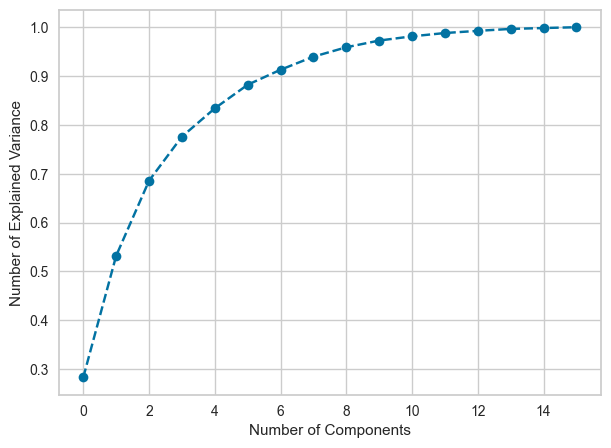

In [78]:
# Farkli component sayilari icin ulasilacak toplam varyanslari grafikle gorelim;

pca = PCA(whiten = True).fit(X)  # whiten = True for normalization
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), "--o")
plt.xlabel("Number of Components")
plt.ylabel("Number of Explained Variance")
plt.show()

**YORUM:** Bu grafige gore 3 component ile toplam varyansin %68'ini temsil edebildigimiz gorulmekte. Bu nedenle analizin bundan sonrasinda 16 feature 3 componente indirilerek devam edilecektir. 

In [93]:
# 16 feature i 3 componente indirelim;

from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
pca 

PCA(n_components=3, random_state=42)

In [94]:
pca_3 = pca.fit_transform(X)

In [95]:
# Olusturdugumuz 7 componenti birer degiskene atayarak df seklinde grelim;
df3 = pd.DataFrame(pca_3, columns = ["Components1", "Components2", "Components3"])
df3 

Components1  Components2  Components3
0       109.998129     3.498785   -21.110223
1        -9.765395    75.791825   -20.889780
2       -75.009300    -8.807804    77.910129
3        -2.951035   -33.793238     8.075707
4       -71.366808    35.754533    53.996237
...            ...          ...          ...
10987    14.714687   -33.416870    15.650193
10988     7.718959    91.848199   -32.549738
10989   109.169357   -61.818164   -27.558442
10990    99.949493   -88.284117    36.880351
10991    15.358108   -29.607747   -40.013578

[10992 rows x 3 columns]

In [96]:
# y yi de bu data frame ekleyelim;
df3["class"]=y
df3

Components1  Components2  Components3  class
0       109.998129     3.498785   -21.110223      8
1        -9.765395    75.791825   -20.889780      2
2       -75.009300    -8.807804    77.910129      1
3        -2.951035   -33.793238     8.075707      4
4       -71.366808    35.754533    53.996237      1
...            ...          ...          ...    ...
10987    14.714687   -33.416870    15.650193      4
10988     7.718959    91.848199   -32.549738      2
10989   109.169357   -61.818164   -27.558442      0
10990    99.949493   -88.284117    36.880351      0
10991    15.358108   -29.607747   -40.013578      4

[10992 rows x 4 columns]

In [97]:
# Yeni olsuturdugumuz bu veri setini kopyalayalim / yedekleyelim;
df3_yedek = df3.copy()

In [98]:
# Yeni olsuturdugumuz bu veri setini disa aktaralim; 

df3.to_excel('df3.xlsx', index=False) # Excel olarak kaydetmek icin


In [11]:
# Disari cikardigimiz 7 componentli veri setini tekrar okutarak analzie alalim;

df3 = pd.read_excel('df3.xlsx')
df3.head(2)

Components1  Components2  Components3  class
0   109.998129     3.498785   -21.110223      8
1    -9.765395    75.791825   -20.889780      2

**ACIKLAMA:** PCA analizi ile 16 feature 3'e indirilmis olup, calismanin bundan sonraki kisimlarinda bu veriler kullanilacaktir. 

## Linear Discriminant Analysis (LDA)

Diger bir biyu azaltma yontemi olan Doğrusal Ayırıcı Analiz (LDA); sınıflar arasındaki ayrımı en üst düzeye çıkaran bir boyut indirgeme tekniğidir. PCA'dan farklı olarak, sınıflar arasındaki farkları gözeterek boyut indirgeme yapar. Bu nedenle, özellikle sınıflandırma problemleri için kullanılır.

In [100]:
df = pd.read_csv("pendigits_txt.csv") 

In [101]:
df.head(3)

input1  input2  input3  input4  input5  input6  input7  input8  input9  \
0      47     100      27      81      57      37      26       0       0   
1       0      89      27     100      42      75      29      45      15   
2       0      57      31      68      72      90     100     100      76   

   input10  input11  input12  input13  input14  input15  input16  class  
0       23       56       53      100       90       40       98      8  
1       15       37        0       69        2      100        6      2  
2       75       50       51       28       25       16        0      1

In [ ]:
X = df[['Feature1', 'Feature2','Feature3']]
y = df['Class']

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# LDA modelini oluşturalım
lda = LinearDiscriminantAnalysis()

In [ ]:
# LDA'yi öğrenelim ve dönüşümü uygulayalım
X_lda = lda.fit_transform(X, y)

In [ ]:
# Sonuçları yazdıralım
print("Orjinal Veri:")
print(X)
print("\nDönüştürülmüş Veri:")
print(X_lda)

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

Bir baska boyut indirgeme yontemi olan t-SNE; özellikle görselleştirmeye yönelik bir boyut indirgeme yöntemidir. Veri noktalarını düşük boyutlu bir uzaya projekte ederken benzer veri noktalarının bir arada kalmasını sağlar. Bu nedenle özellikle veri keşfi ve görselleştirme için kullanılır.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = df[['Feature1', 'Feature2']]
y = df['Class']

In [ ]:
# t-SNE modelini oluşturalım ve dönüşümü uygulayalım
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

In [ ]:
# Görselleştirme
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.map({'A': 'blue', 'B': 'red'}))
plt.title("t-SNE Görselleştirme")
plt.xlabel("Bileşen 1")
plt.ylabel("Bileşen 2")
plt.show()

## Descriptive Statistics for 3 Components

In [103]:
df3.head()

Components1  Components2  Components3  class
0   109.998129     3.498785   -21.110223      8
1    -9.765395    75.791825   -20.889780      2
2   -75.009300    -8.807804    77.910129      1
3    -2.951035   -33.793238     8.075707      4
4   -71.366808    35.754533    53.996237      1

### Describtive Stat

In [104]:
df3.describe().T

count          mean        std         min        25%  \
Components1  10992.0 -1.654830e-16  64.913118 -102.691231 -59.715943   
Components2  10992.0  5.129974e-15  60.844628 -115.989934 -49.437380   
Components3  10992.0  1.158381e-15  47.807458 -120.055623 -25.822947   
class        10992.0  4.431587e+00   2.876947    0.000000   2.000000   

                   50%        75%         max  
Components1  -7.263410  36.594420  148.794843  
Components2 -17.571195  63.437918  116.794626  
Components3   1.297502  28.670021  145.486329  
class         4.000000   7.000000    9.000000

### Correlation Analysis

In [12]:
df3.corr = df3.select_dtypes(include=['number']).corr()
df3.corr

Components1   Components2   Components3     class
Components1  1.000000e+00 -7.552372e-16  1.023920e-16 -0.035716
Components2 -7.552372e-16  1.000000e+00  2.290811e-16  0.015618
Components3  1.023920e-16  2.290811e-16  1.000000e+00 -0.299149
class       -3.571638e-02  1.561819e-02 -2.991491e-01  1.000000

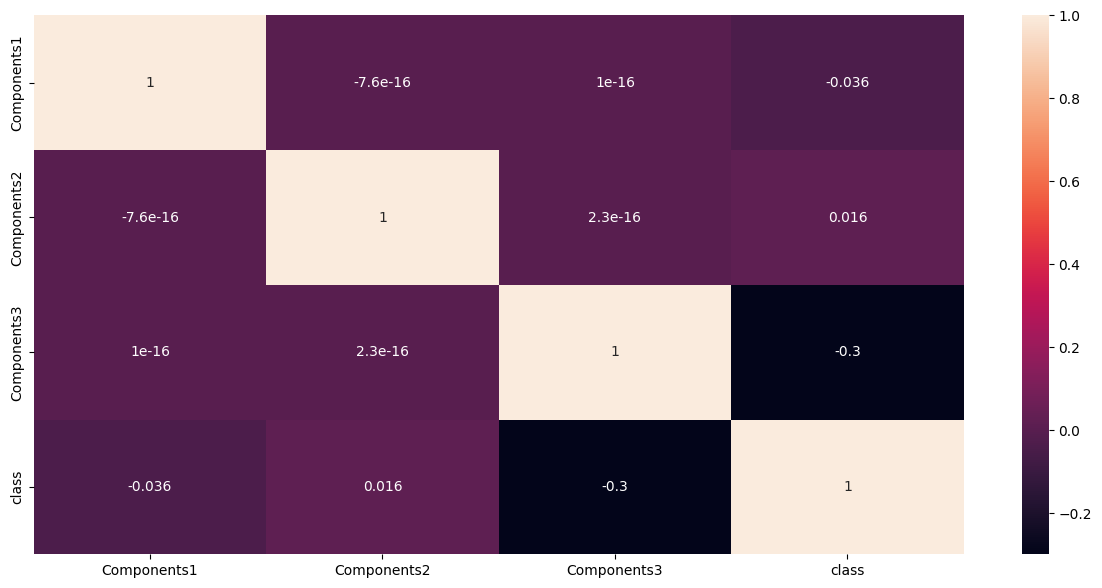

In [13]:
sns.heatmap(df3.corr, annot = True)

#sns.heatmap(df.corr, annot = True)
plt.show()

## Data Visulation with 3 Components

In [83]:
# For default settings of figures; 

plt.rcParams.update(plt.rcParamsDefault)

### Pairplot

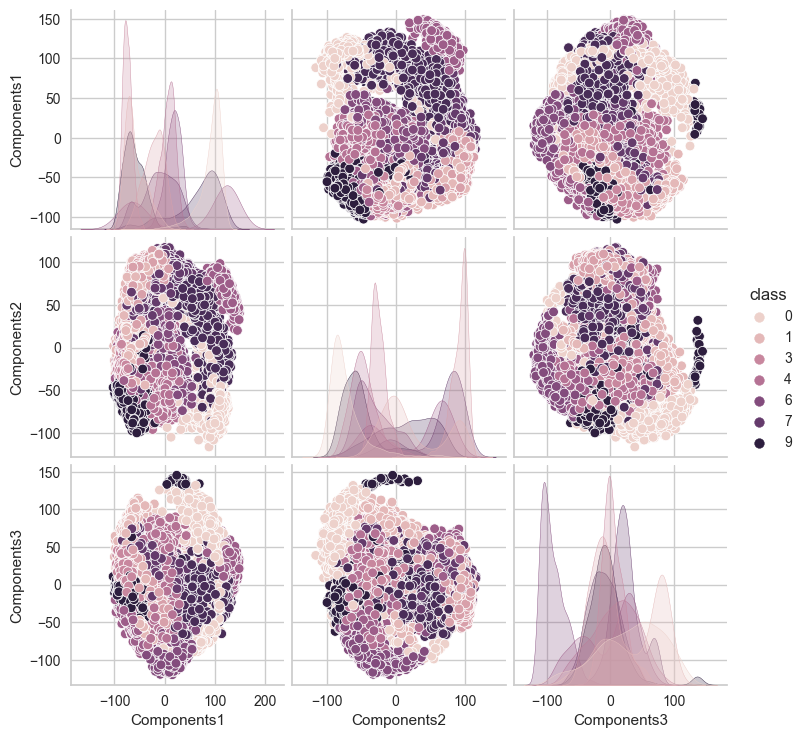

In [91]:
sns.pairplot(df3, hue = "class")
plt.show();

**YORUM:** Siniflarin gorece kolay ayirt edilebilir formda oladuklari gorulmektedir. 

### Outlier Analysis with Boxplot

Text(0, 0.5, 'Power spectral density (normalized)')

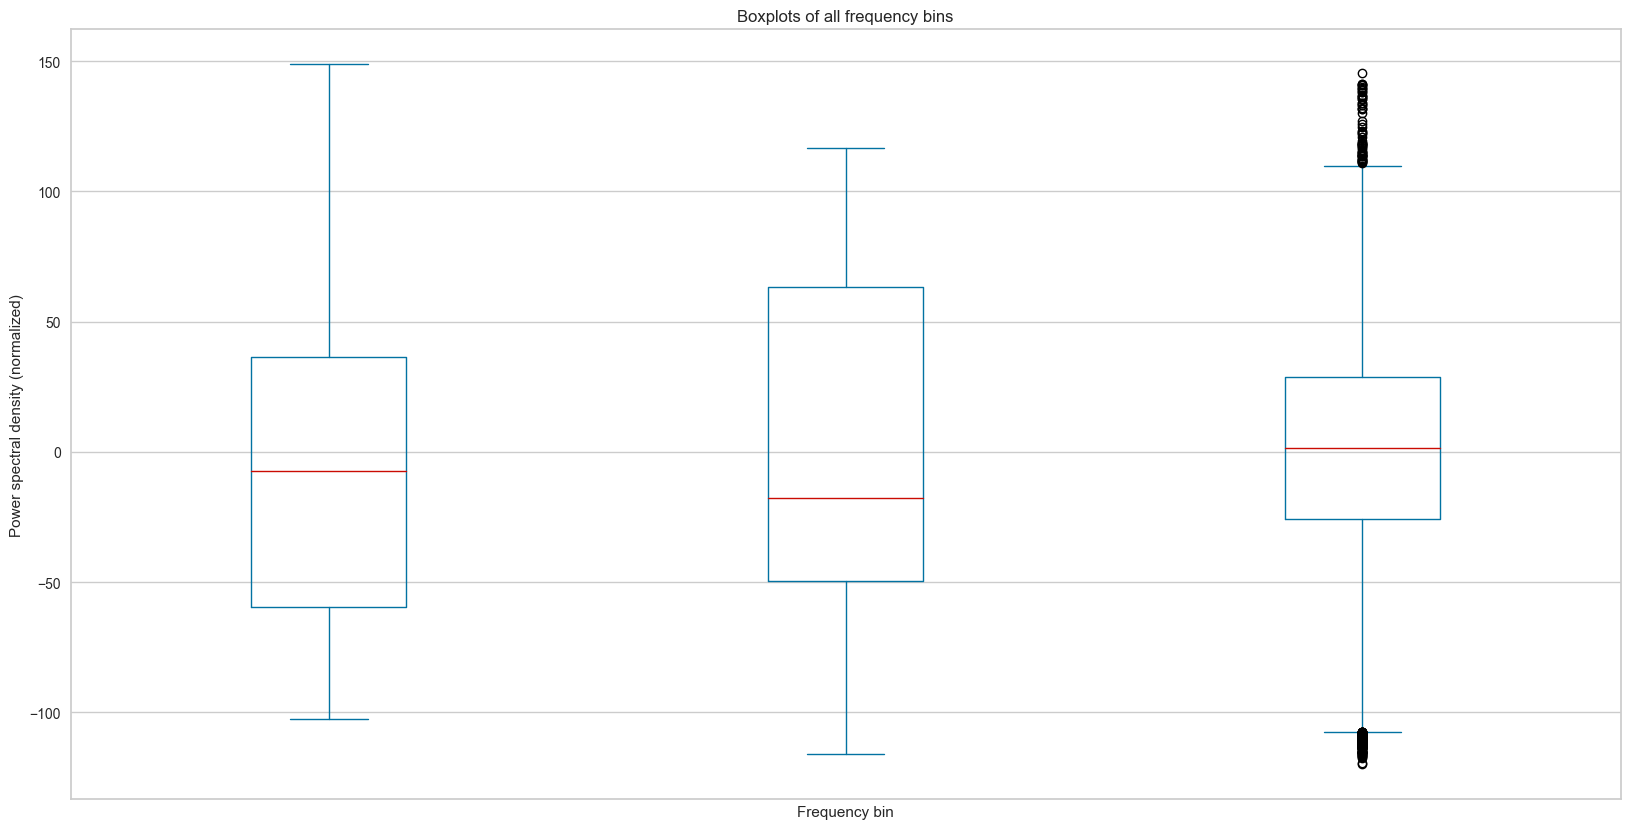

In [93]:
X = df3.iloc[:,:-1]
X.plot.box(figsize=(20,10),xticks=[])
plt.title('Boxplots of all frequency bins')
plt.xlabel('Frequency bin')
plt.ylabel('Power spectral density (normalized)')

**YORUM:** Veri setinde outlier degerler olmakla birlikte, kisilerin el yazilarindan rassal olarak secilen bir orneklemde bu tur gozlemlerin bulunmasi dogal oldugu icin bu degerler analizden dislanmamistir. 

### Scatterplot

Text(0.5, 1.0, 'Pen Digits Data')

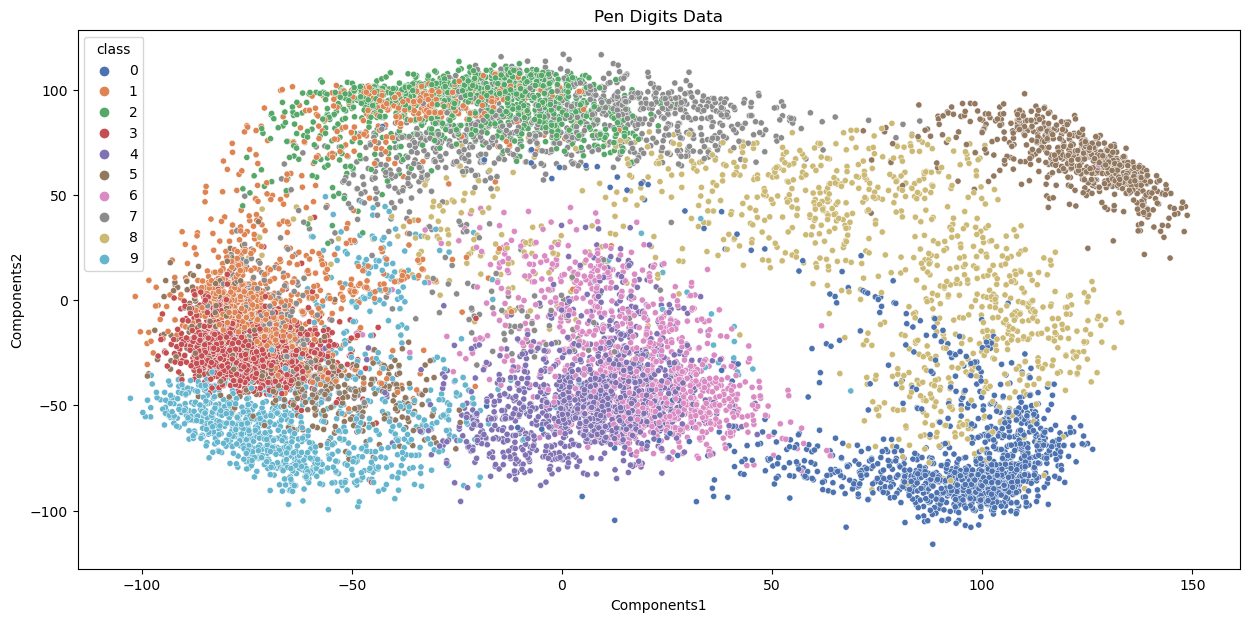

In [30]:
sns.scatterplot(data=df7, x="Components1", y="Components2", hue="class", s=20, palette='deep',legend="full" )
plt.title('Pen Digits Data')

Text(0.5, 1.0, 'Pen Digits Data')

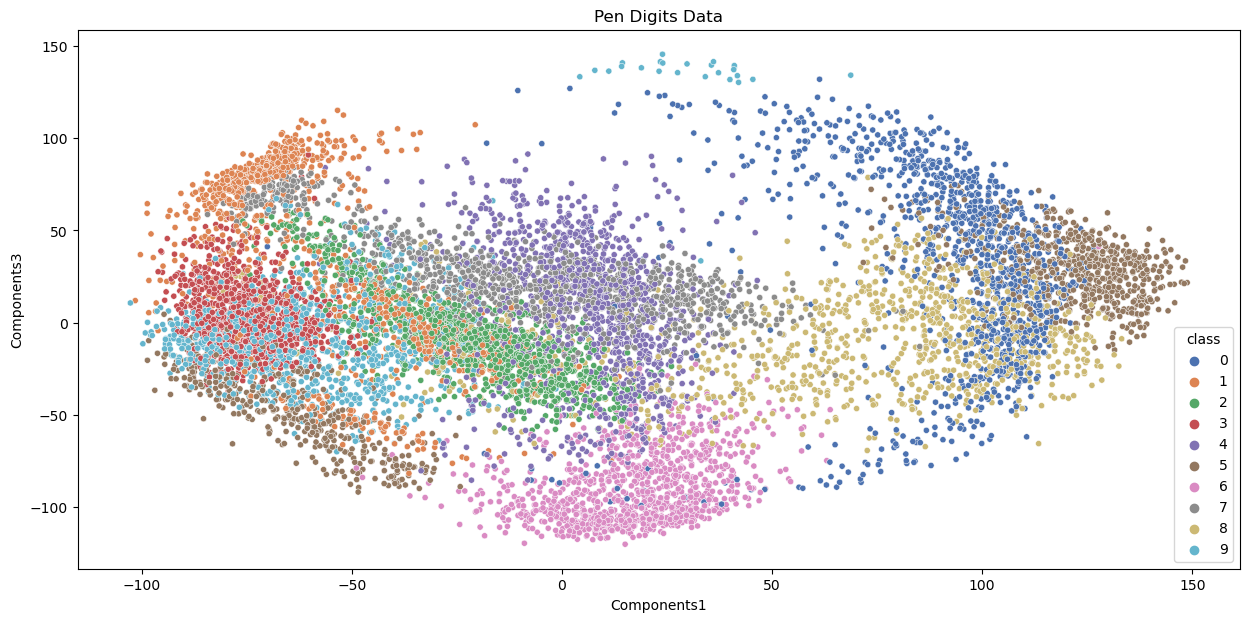

In [31]:
sns.scatterplot(data=df7, x="Components1", y="Components3", hue="class", s=20, palette='deep',legend="full" )
plt.title('Pen Digits Data')

Text(0.5, 1.0, 'Pen Digits Data')

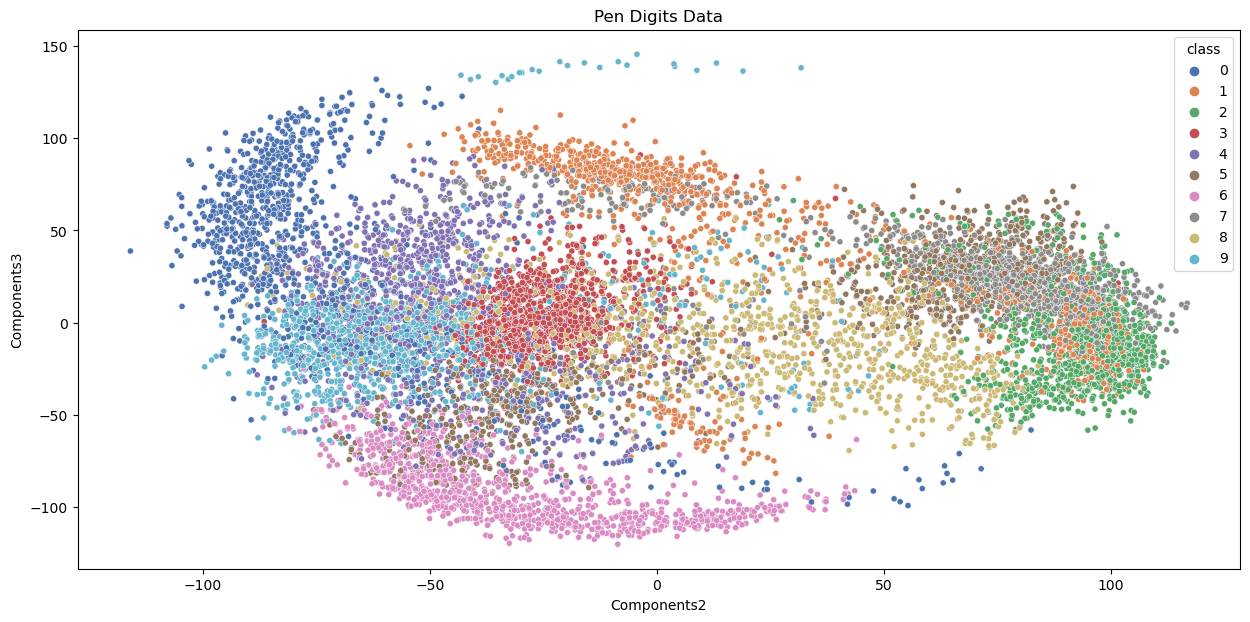

In [32]:
sns.scatterplot(data=df7, x="Components2", y="Components3", hue="class", s=20, palette='deep',legend="full" )
plt.title('Pen Digits Data')

**YORUM:** Bu grafiklere bakildiginda el yazilarinin 0, 1,3 ve 6 icin ayristigi, digerlerinin daha girift bir yapida oldugu gorulmektedir. 

## 3D Grafik

In [30]:
%matplotlib inline
%matplotlib notebook 
# sonra is bitince kapat bunu

In [31]:
# 3D Grafik;

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Components1'], df2['Components2'], df2['Components3'], c=df2['class'])
plt.show()

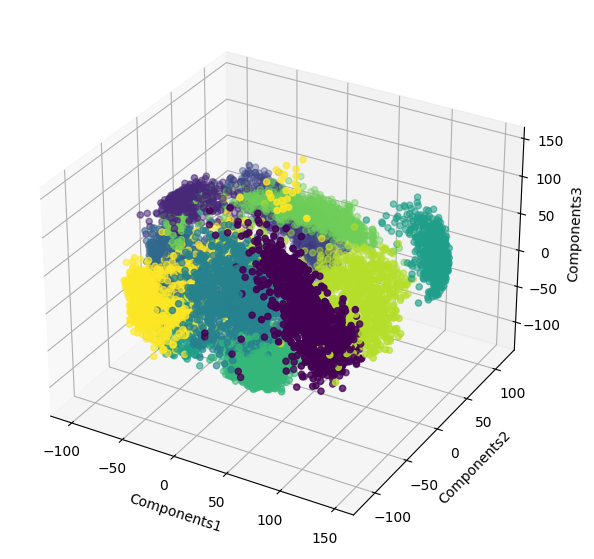

In [25]:
# 2 YOL; 
""" import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.colors as mcolors

# Set colours by classes with ListedColormap
cmap = mcolors.ListedColormap(['red', 'green'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Components1'], df2['Components2'], df2['Components3'], c=df2['class'])

ax.set_xlabel('Components1')
ax.set_ylabel('Components2')
ax.set_zlabel('Components3')

plt.show()"""

In [99]:
#3.YOL;
import plotly.express as px

fig = px.scatter_3d(x=df3["Components1"], y=df3["Components2"], 
                    z=df3["Components3"], color="class")
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'color' is of type str or int.

**YORUM:** 3D grafikte classlarin (el yazmasi rakamlarin) birbirinden kolay ayrilabilir formatta olduklari degerlendirilmekedir. 

# Labelling & Train-Test Split

In [100]:
X=df3.drop(["class"], axis=1)
y=df3["class"]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False, random_state = 42)

# shuffle=False yapmak lazim cunku gozlemler sirayla verilmis. Bu sekilde bastan %70'ni 
# (44 yazarin el yazmalarini) traine, gerisini (14 yazarin el yazmalarini, %30) teste ayiracak.

In [103]:
X_train.shape, X_test.shape

((7694, 3), (3298, 3))

**YORUM:** Train kisminda 7694, test kisminda 3298 gozlem bulunmaktadir.

# Lazy Predict for an Overview of the Models

In [29]:
from lazypredict.Supervised import LazyClassifier

# LazyClassifier'ı oluşturmak
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Modeli eğitmek
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Sonuçları yazdırmak
print(models)


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:38<00:02,  2.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 7694, number of used features: 7
[LightGBM] [Info] Start training from score -2.252397
[LightGBM] [Info] Start training from score -2.259841
[LightGBM] [Info] Start training from score -2.266087
[LightGBM] [Info] Start training from score -2.346966
[LightGBM] [Info] Start training from score -2.266087
[LightGBM] [Info] Start training from score -2.344252
[LightGBM] [Info] Start training from score -2.346966
[LightGBM] [Info] Start training from score -2.271113
[LightGBM] [Info] Start training from score -2.337500
[LightGBM] [Info] Start training from score -2.342898
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:44<00:00,  1.53s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.96               0.96    None      0.96   
ExtraTreesClassifier               0.95               0.96    None      0.95   
KNeighborsClassifier               0.95               0.96    None      0.95   
LabelSpreading                     0.95               0.95    None      0.95   
LabelPropagation                   0.95               0.95    None      0.95   
RandomForestClassifier             0.95               0.95    None      0.95   
LGBMClassifier                     0.95               0.95    None      0.95   
XGBClassifier                      0.94               0.95    None      0.94   
BaggingClassifier                  0.93               0.93    None      0.93   
DecisionTreeClassifier             0.92               0.92    None      0.92   
QuadraticDiscriminantAnalysis      0.91 

**Yorum:** Bu sonuclara gore ele alinan veri setinde en iyi skorlari, en kisa surede veren algoritma; SVC (Support Vector Classifier)'dir.   

# Random Forest Classifier

Scaling is not necessary for random forests. For this reason we use the original series in these analyses.

## Modelling and Model Performance

In [10]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Decision Tree Classifier

Bu projede verilen gorev Random Forest yontemini kullanmak olmakla birlikte, Random Forestin temelini olusturmasi yonuyle calismaya Decisiyon Tree analizi ile baslanmasinin daha dogru olacagina karar verilmisitir.

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [105]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[286   0   1   0   0   0  10   0  37   0]
 [  0 205  86   3   0  10   0  22   2  12]
 [  0  68 252   1   0   0   0  19   5   1]
 [  1  20   0 260   0   5   0   1   6  26]
 [  0   2   0   0 294   2  23   4   7  14]
 [  0   4   0  15   0 260   0   1   0  37]
 [  1   1   0   0   5   3 310   0   0   0]
 [  0  27  12   0  18   0   0 277  12   2]
 [ 20   1   4   0   1   1   1  13 271   0]
 [  0   5   0  14   4  11   0   8   3 271]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       334
           1       0.62      0.60      0.61       340
           2       0.71      0.73      0.72       346
           3       0.89      0.82      0.85       319
           4       0.91      0.85      0.88       346
           5       0.89      0.82      0.85       317
           6       0.90      0.97      0.93       320
           7       0.80      0.80      0.80       348
           8       0.79      0.87      0.83       312
           9       

**Yorum:** Modelin train kismindaki basarisi %100, accuracy 1 iken test kisminda accuracy 0.81 olmustur. Overfitting olabilecegi endisesiyle CV yapmaya karar verilmistir. 

### Cross Validate

In [106]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [107]:
model = DecisionTreeClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.84
test_precision_micro   0.84
test_recall_micro      0.84
test_f1_micro          0.84
dtype: float64

**YORUM:** CV de elde edilen sonuclar (Or; accuracy = 0.84) test datasina ait sonuclarla (accuracy = 0.81) uyumlu  oldugu icin, Decision Tree modelinde overfit olmadigina karar verilmistir. Ancak modelin tahmin basarisi, veri seti daraltildigi icin belirgin sekilde dusmustur.  Bu nedenle **tum featureler kullanilarak yapilan ilk analizin sonuclarinin daha gecerli oldugu**na karar verilmis, **PCA sonucu elde edilen componenetlerle yapilan diger analizlerin sonuclarinin rapor edilmemesinin daha uygun olacagi degerlendirilmsitir**.  

# CONCLUSSION

Bu calismada; 44 kisinin, kendilerine verilen tabletlere el yazisi ile yazdiklari 0-9 arasi rakamlarin Machine Learning algoritmalari tarafindan tespit edilmesi hedeflenmistir. El yazilarinin 16 farkli ozelligi tespit edilmis ve algoritmalara bu ozellikler verilip, yazilan rakamin gercekte hangi rakam olabilecegi sorulmustur. Her kisi 250 defa rakam yazmis olup, veri seti 10992 satir ve 17 sutundan olusmaktadir. Veriler, rakamlari yazan kisilere gore sirali bir formatta gelmistir. Gorece dengeli bir yapiya sahip olan veri seti, train ve test datasi olarak ayrilirken; 44 yazardan ilk 30'u traine, kalan 14'u teste ayrilmak istenmistir. Bu ayrimi yapabilmek icin verilerin karistirilmamasi geregi dogmus ve bu amacla `shuffle=False` yapilmistir. Son 14 yazardan gelen verileri test kismina ayirabilmek icin 14/44=0.31 oldugundan `test_size = 0.3` alinmistir. 

Tum analizler once verilerin orijinal halleri ile gerceklestirilmis, train datasinda 1, test datasinda 0.99 skorlar elde edilmis, cross validation islemlerinde NaN sonucuyla karsilasilmistir. Bu sonuctan suphelenilerek, feature sayisinin azaltilmasina karar verilmsitir. Anacak bu islemi yaparken gerekli bazi bilgileri analiz disi birakmamak icin featurelerin baziarini atmak yerine, Principle Component Analizi (PCA) yapilmistir. PCA'da optimal bilsen sayisini belirleyebilmek icin Öğündür (2020) ve Singh (2023) izlenerek, varyans analizi yapilmis ve toplam aciklanan varyansi cok dusurmeyecek sekilde 16 feature'in 7 bilesene indirilmesine karar verilmisitr. 

Lazy Predict yontemiyle yapilan modellere genel bakista; en iyi skorlari, en kisa surede veren algoritmanin SVC (Support Vector Classifier) oldugu goruldu. Bu projede verilen gorev Random Forest ve SVC yontemlerini kullanmak olmakla birlikte, Random Forest (RF) yonteminin temelini olusturmasi yonuyle calismaya Decisiyon Tree (DT) analizi ile baslanmasinin daha dogru olacagina karar verildi. DT - CV analizinda train kismina ait accuracy skoru 0.93, test kismina ait accuracy skoru 0.92 olmustur. Modelde overfitting olmadigina ve modelin basarisinin iyi olduguna karar verilmistir. 

Random Forest modeliyle yapilan analizlerde train kismina ait accuracy skoru 0.97'ye, test kismina ait accuracy skoru 0.95'e yukselmistir. Bu analiz Grid Serach ve Optuna yontemleriyle de desteklenmis, benzer sonuclara ulasilmistir. 

Calismada daha sonra Lazy Predict ynteminin en iyi algoritma olarak sectigi Support Vector Machine Classifier (SVC) analizleri gerceklestirilmistir. SVC gibi mesafe tabanli analizlerde scaling islemi onemli oldugu icin bu asamada veriler StandardScaler yontemiyle scale edilerek kullanilmisitir. SVC analizleri pipline kullanilarak ve manuel olarak iki farkli yontemle es anli bicimde yurutulmustur. SVC yontemide yine train kismina ait accuracy skoru 0.97, test kismina ait accuracy skoru 0.95 bulunmutur. Grid Search sonrasinda model skoru 0.99'a kadar yukselmistir. Bu kisim Optuna ile de desteklenmis ve Optuna yontemiyle elde edilen best modelde skor 95 bulunmustur. Grid serach'de bu deger 0.92 idi. Demek ki Optuna GridSearch'den daha iyi skorlar uretmistir.

Calismadan elde edilen bulgular genel olarak degerlendirilmek istenirse; Computer Vision (Goruntu Isleme) yontemiyle elde edilen verilerin siniflandirilmasinda Random Forest de Support Vector Classifier de oldukca basarili sonuclar ortaya cikarabilmistir. Burada dikkat edilmesi gereken husus; RF'de sart olmayan scaling isleminin, SVC'de onemli oldugudur. Sonraki arastirmacilarin da bu noktaya dikkat ederek, Computer Vision yontemiyle elde edilen verilerin siniflandirilmasinda Random Forest ve Support Vector Classifier yontemlerini guvenle kullanabilecekleri ifade edilebilir. 

# REFERENCES

Alpaydin, E. and Alimoglu, F. (1996). Combining multiple representations and classifiers for pen-based handwritten digit recognition. Proceedings of the Fourth International Conference on Document Analysis and Recognition. doi:10.1109/icdar.1997.620583

Alpaydin, E. and Alimoglu, F. (2021). Pendigits. https://www.openml.org/search?type=data&sort=runs&id=32&status=active

Dang, D. (2019). Recognition of Handwritten Digits. https://www.kaggle.com/code/hoandan/recognition-of-handwritten-digits

Datahub (2019). Pendigits. https://datahub.io/machine-learning/pendigits#readme

EmKa (2023). Hyperparameter Tuning - Karşılaştırma. https://github.com/EmKa-Academy/ML-DS-Ogretici-Notebooklar/blob/main/GridSearch%20vs%20RandomSearch%20vs%20Optuna/grid_search%20vs%20random_search%20vs%20optuna.ipynb

Singh, C. (2023). Multiclass_Classification_using-SVM_PCA_TSNE. https://www.kaggle.com/code/chakreshkrsingh/multiclass-classification-using-svm-pca-tsne

Öğündür, G. (2020). PCA ( Principal Component Analysis) Temel Bileşenler Analizi. https://medium.com/@gulcanogundur/pca-principal-component-analysis-temel-bile%C5%9Fenler-analizi-bf9098751c62
